# Histogramas en Python

## Funciones de densidad y de probabilidad

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mu = 10, 20
sigma = 5, 2
dist = pd.DataFrame(
    np.random.normal(loc=mu, scale=sigma, size=(1000, 2)), columns=['x1', 'x2']
)

In [3]:
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

,x1,x2
min,-8.39,13.30
max,27.29,26.04
mean,9.99,19.91
std,5.03,1.97


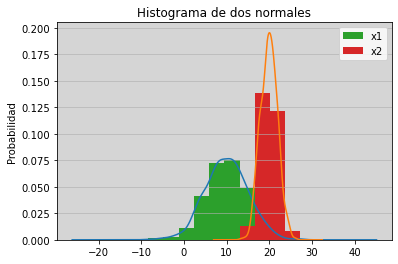

In [8]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histograma de dos normales')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probabilidad')
ax.grid(axis='y', alpha=0.75)
ax.set_facecolor('#d5d5d5')

### Distribución normal teórica N(0,1) exp(-x**2 / 2) / sqrt(2 * pi)

In [9]:
from scipy import stats

In [10]:
dist = stats.norm()

In [11]:
sample = dist.rvs(size=1000)

In [12]:
stats.norm.ppf(0.01)  # Percentil 1 de la normal

-2.3263478740408408

In [13]:
stats.norm.ppf(0.99)  # Percentil 99 de la normal

2.3263478740408408

In [14]:
x = np.linspace(start=stats.norm.ppf(0.01), stop=stats.norm.ppf(0.99), num=250)

In [16]:
gkde = stats.gaussian_kde(dataset=sample)

Text(-2.0, 0.35, '$f(x) = \\frac{e^{-x^2/2}}{\\sqrt{2 \\pi}}$')

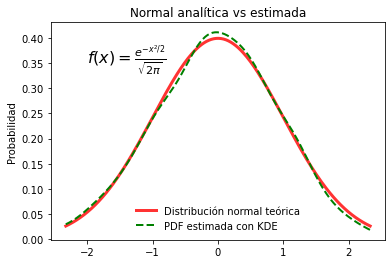

In [27]:
fig, ax = plt.subplots()
ax.plot(
    x, dist.pdf(x), linestyle='solid', c='r', lw=3, alpha=0.8, 
    label='Distribución normal teórica'
)  # Curva de distribución normal real
ax.plot(
    x, gkde.evaluate(x), linestyle='dashed', c='g', lw=2, 
    label='PDF estimada con KDE'
)  # Curva de distribución normal aproximada
ax.legend(loc='best', frameon=False)
ax.set_title('Normal analítica vs estimada')
ax.set_ylabel('Probabilidad')
ax.text(-2., 0.35, r'$f(x) = \frac{e^{-x^2/2}}{\sqrt{2 \pi}}$', fontsize=16)